# Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data Preprocessing

### Training Image preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [7]:
cnn = tf.keras.models.Sequential()

In [8]:
# Building Convolution Layer

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

C:\Users\shekh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [15]:
cnn.add(tf.keras.layers.Flatten())

In [16]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [17]:
cnn.add(tf.keras.layers.Dropout(0.4))

In [18]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

## Compiling Model

In [19]:
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Model Training

In [21]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 916s 416ms/step - accuracy: 0.3941 - loss: 2.1450 - val_accuracy: 0.8453 - val_loss: 0.5038
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1127s 513ms/step - accuracy: 0.8376 - loss: 0.5120 - val_accuracy: 0.8931 - val_loss: 0.3264
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 913s 415ms/step - accuracy: 0.9057 - loss: 0.2914 - val_accuracy: 0.9319 - val_loss: 0.2117
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 927s 422ms/step - accuracy: 0.9375 - loss: 0.1942 - val_accuracy: 0.9539 - val_loss: 0.1417
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 922s 420ms/step - accuracy: 0.9553 - loss: 0.1368 - val_accuracy: 0.9536 - val_loss: 0.1426
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 934s 425ms/step - accuracy: 0.9644 - loss: 0.1081 - val_accuracy: 0.9585 - val_loss: 0.1269
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 932s 424ms/step - accuracy: 0.9722 - loss: 0.0860 - val_accuracy: 0.9607 - val_loss: 0.1337
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 935s 426ms/step - a

## Evaluation of Model

In [22]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 219s 100ms/step - accuracy: 0.9893 - loss: 0.0340
Training accuracy: 0.9904829859733582


In [23]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 54s 99ms/step - accuracy: 0.9621 - loss: 0.1168
Validation accuracy: 0.9613020420074463


In [24]:
cnn.save('trained_plant_disease_model.keras')

In [25]:
training_history.history #Return Dictionary of history

{'accuracy': [0.600867748260498,
  0.8625933527946472,
  0.9150437712669373,
  0.9413898587226868,
  0.9567679166793823,
  0.9659435153007507,
  0.9734689593315125,
  0.9770680665969849,
  0.9805960655212402,
  0.9826445579528809],
 'loss': [1.35100519657135,
  0.43445754051208496,
  0.25999975204467773,
  0.17998069524765015,
  0.13236193358898163,
  0.10436572134494781,
  0.08141365647315979,
  0.07006735354661942,
  0.06046856567263603,
  0.05511581152677536],
 'val_accuracy': [0.8452652096748352,
  0.8930684924125671,
  0.9318802356719971,
  0.9539039134979248,
  0.9535624980926514,
  0.9584566354751587,
  0.9607329964637756,
  0.9556112289428711,
  0.9619280695915222,
  0.9613020420074463],
 'val_loss': [0.5038106441497803,
  0.32637888193130493,
  0.21167467534542084,
  0.14171291887760162,
  0.14260993897914886,
  0.12693019211292267,
  0.13370414078235626,
  0.1474514901638031,
  0.12880036234855652,
  0.11900106072425842]}

In [26]:
import json
with open('training_hist.json','w') as f:
    json.dump(training_history.history,f)

In [27]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

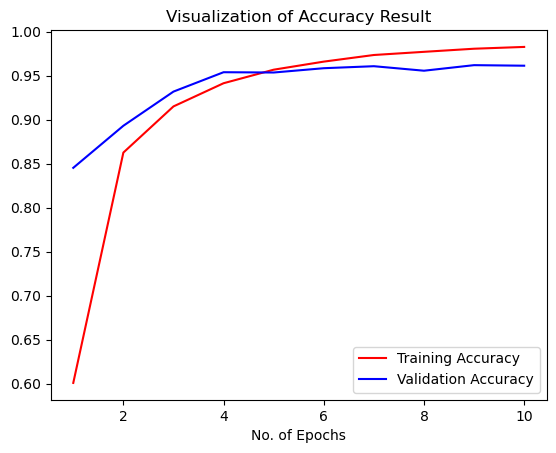

In [28]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()


In [29]:
class_name = validation_set.class_names

In [30]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 17572 files belonging to 38 classes.


In [31]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 200s 11ms/step


In [32]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [33]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [34]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [35]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [36]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.94      0.95       504
                                 Apple___Black_rot       0.92      0.99      0.96       497
                          Apple___Cedar_apple_rust       0.97      0.98      0.98       440
                                   Apple___healthy       0.95      0.96      0.95       502
                               Blueberry___healthy       0.96      0.97      0.96       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.90      0.92      0.91       410
                       Corn_(maize)___Common_rust_       1.00      0.97      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.97      0.

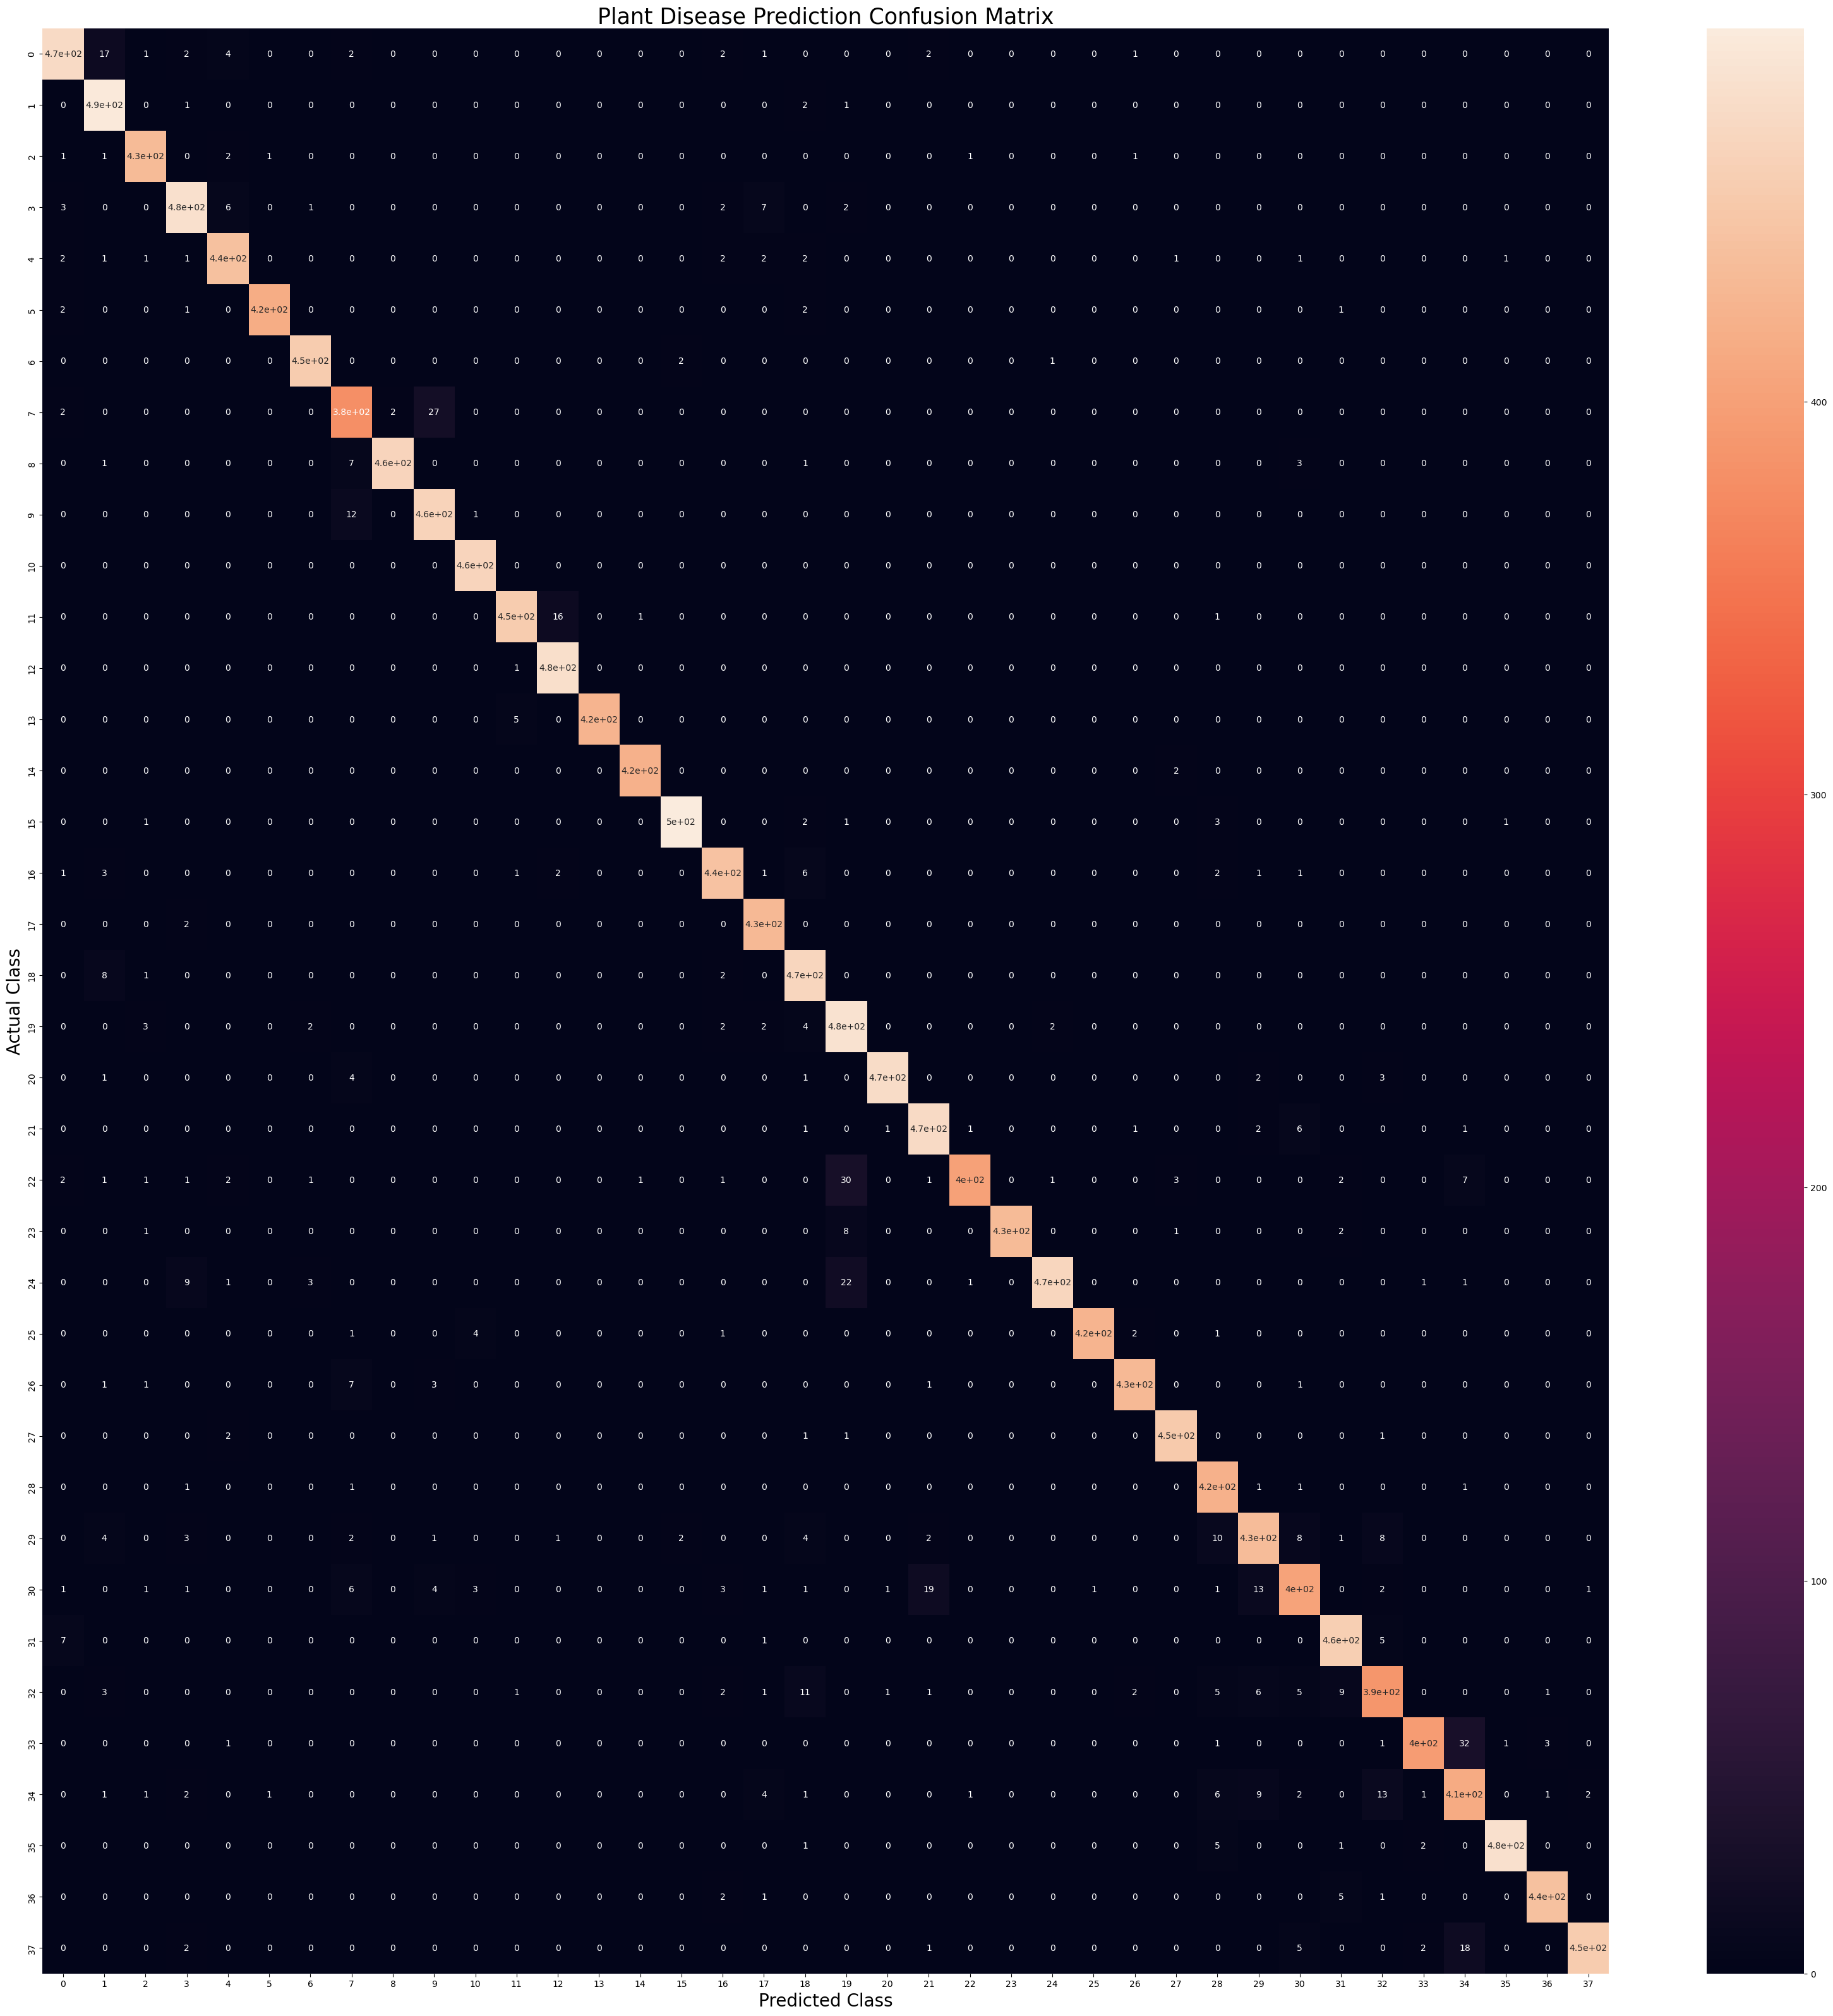

In [37]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

##### 